## Ch `07`: Concept 02

## Autoencoder with images

Import the autoencoder class we wrote earlier:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pickle
import numpy as np
from autoencoder import Autoencoder

Define some helper function to load and preprocess the data:

In [2]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

Download the CIFAR-10 dataset in Python from https://www.cs.toronto.edu/~kriz/cifar.html. Then we can load the data using the following code:

In [3]:
names = unpickle('./cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = './cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

data = grayscale(data)
x = np.matrix(data)
y = np.array(labels)

Train the autoencoder on images of horses:

(5000, 1024)
Some examples of horse images we will feed to the autoencoder for training


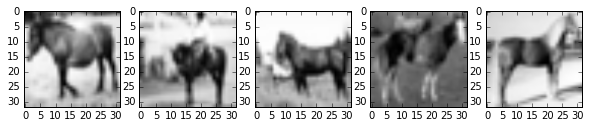

In [4]:
horse_indices = np.where(y == 7)[0]
horse_x = x[horse_indices]
print(np.shape(horse_x))  # (5000, 3072)

print('Some examples of horse images we will feed to the autoencoder for training')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(horse_x[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [5]:
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.train(horse_x)

epoch 0: loss = 141.4900665283203
epoch 10: loss = 72.48475646972656
epoch 20: loss = 60.29756164550781
epoch 30: loss = 62.54150390625
epoch 40: loss = 58.15482711791992
epoch 50: loss = 56.428043365478516
epoch 60: loss = 57.38883590698242
epoch 70: loss = 58.01189041137695
epoch 80: loss = 55.45024871826172
epoch 90: loss = 53.27738571166992
epoch 100: loss = 55.66946029663086
epoch 110: loss = 52.93635177612305
epoch 120: loss = 52.29307174682617
epoch 130: loss = 51.190956115722656
epoch 140: loss = 52.70167922973633
epoch 150: loss = 51.69100570678711
epoch 160: loss = 52.5902099609375
epoch 170: loss = 54.53725814819336
epoch 180: loss = 50.20492935180664
epoch 190: loss = 50.705711364746094
epoch 200: loss = 52.63679504394531
epoch 210: loss = 47.62162780761719
epoch 220: loss = 51.37104415893555
epoch 230: loss = 50.87934494018555
epoch 240: loss = 47.789520263671875
epoch 250: loss = 48.64930725097656
epoch 260: loss = 49.09609603881836
epoch 270: loss = 52.35578155517578
epo

Test the autoencoder on other images:

In [6]:
test_data = unpickle('./cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
encodings = ae.classify(test_x, test_labels)

data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 67.4191074286
not horse 65.5469002694


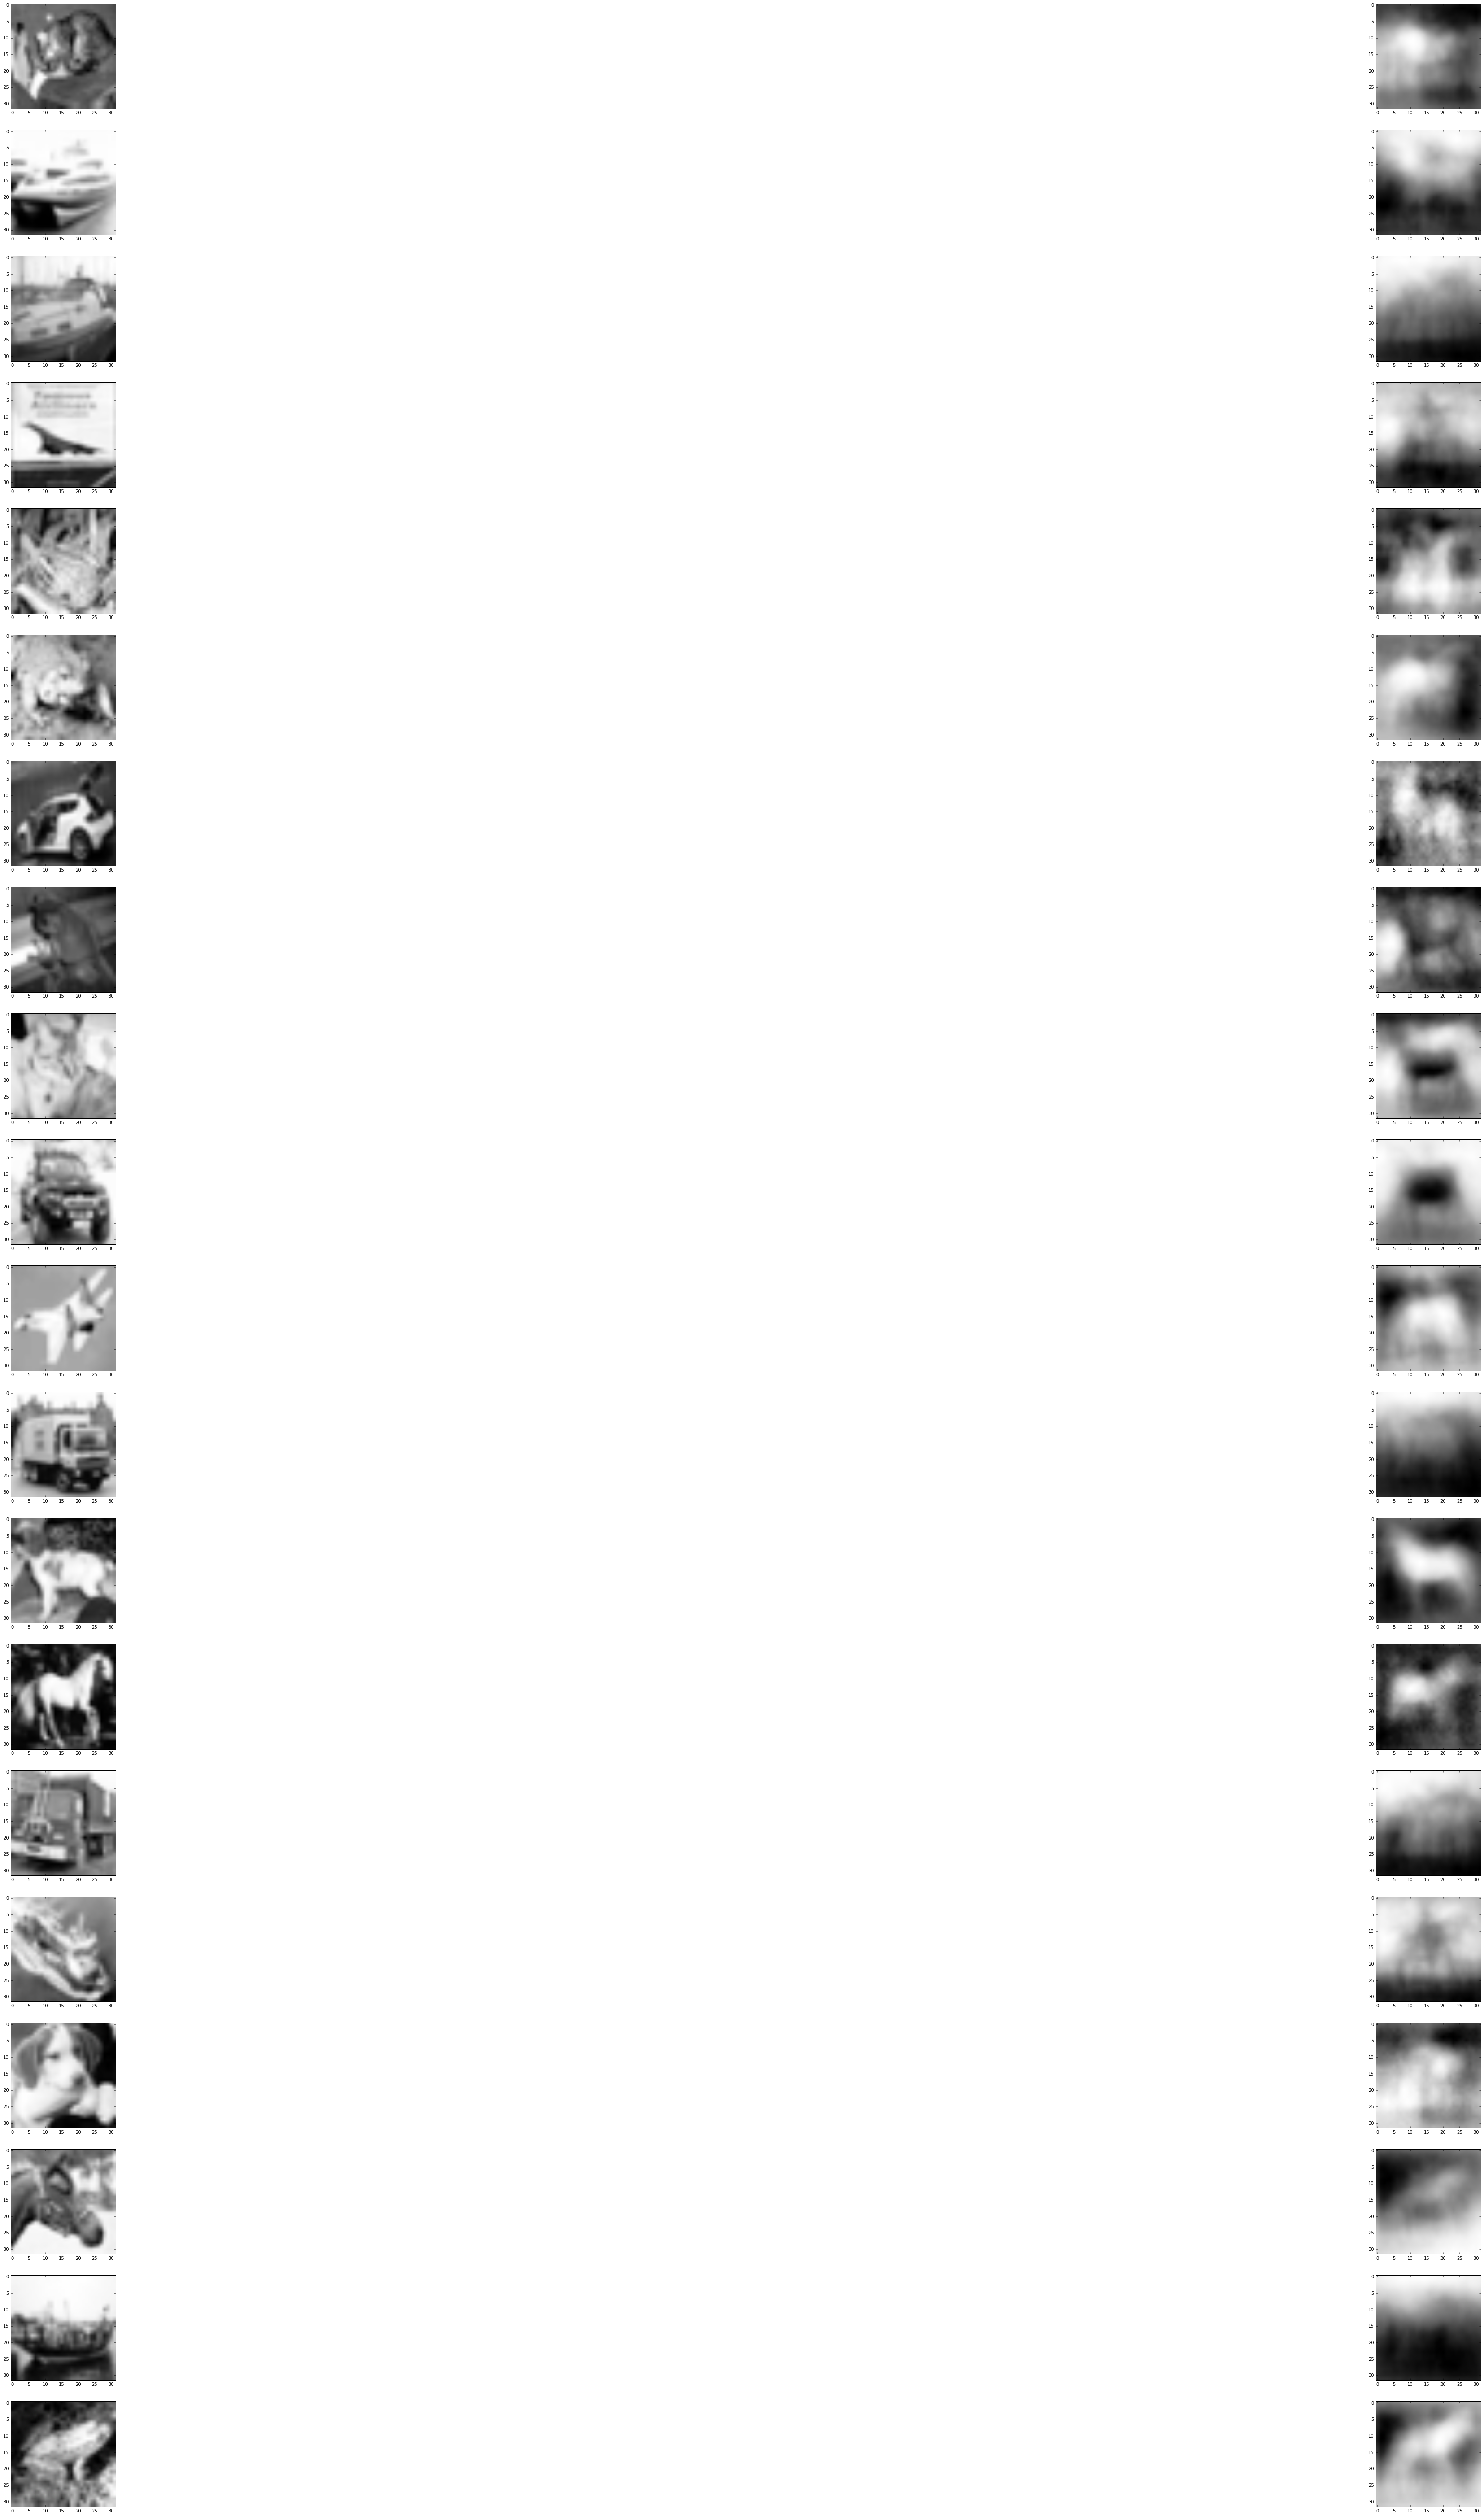

In [7]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_x[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = ae.decode([encodings[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()